# Mašinsko učenje - Linearni klasifikatori

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Zadatak 1
Napisati kod za obučavanje perceptrona. Perceptron je linearni klasifikator koji kao izlaz daje vrednosti 0 ili 1. Proces obučavanja perceptrona podrazumeva ažuriranje težina po jednačini $\vec{w} = \vec{w} + \alpha(y_i-\hat{y_i})x_i$ gde je $\alpha$ brzina učenja, $y_i$ očekivana vrednost, $\hat{y_i}$ vrednost koju je vratio model, $x_i$ ulazni vektor. Ažuriranje težina se vrši za svaki primer iz obučavajućeg skupa podataka. Rešenje testirati na zadatim podacima.

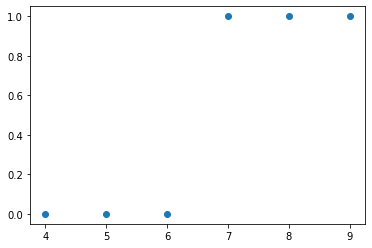

In [2]:
x = np.array([4, 5, 6, 7, 8, 9])
y = np.array([0, 0, 0, 1, 1, 1])
plt.scatter(x, y)

## Rešenje

In [3]:
def perceptron(x, y, lr=0.1, maksimalno_koraka=1000):
    w = np.random.random(len(x[0]))
    for _ in range(maksimalno_koraka):
        for i, xp in enumerate(x):
            yp = xp@w
            if yp > 0:
                yp = 1
            else:
                yp = 0
            for j in range(len(w)):
                w[j] += (y[i] - yp)*xp[j]*lr
    
    def model(x):
        return np.where(x@w > 0, 1, 0)
    
    return model

xx = np.column_stack((x, np.ones(len(x))))
model = perceptron(xx, y)

plt.scatter(x, y)
plt_x = np.linspace(3, 10, 100)
plt_xx = np.column_stack([plt_x, np.ones(len(plt_x))])
plt.plot(plt_x, model(plt_xx), 'r')

## Zadatak 2
Napisati kod za obučavanje logističke regresije. Logistička regresija je linearni klasifikator koji kao izlaz daje vrednosti iz opsega $[0, 1]$. Izlaz se dobija tako što se izlaz regresije prosledi funkciji $s(x)=\frac{1}{1+e^{-x}}$ Proces obučavanja logistčke regresije podrazumeva ažuriranje težina u suprotnom smeru od smera gradijenta dobijenog na osnovu parcijalnih izvoda funkcije greške po zežinama.

In [4]:
x = np.array([5, -1, 6, 8, 9, 16])
y = np.array([0, 0, 0, 1, 1, 1])
plt.scatter(x, y)

## Rešenje

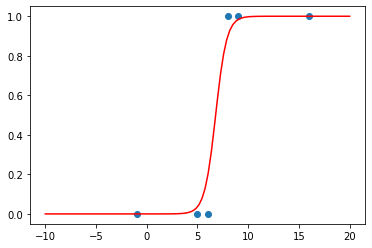

In [5]:
def greska(y_p, y):
    return (y_p - y)**2

def izvod_greske(y_p, y):
    return 2*(y_p - y)

def s(x):
    return 1/(1+np.exp(-x))

def izvod_s(x):
    return s(x)*(1-s(x))

def log_reg_sgd(x, y, lr=0.1, maksimalno_koraka=1000):
    w = np.random.random(len(x[0]))
    for _ in range(maksimalno_koraka):
        for i, xp in enumerate(x):
            wd = np.zeros(len(w))
            for j in range(len(w)):
                wd[j] = (2*izvod_greske(s(xp@w), y[i])*izvod_s(xp@w)*xp[j])
            w -= lr*wd
    
    def model(x):
        return s(x@w)
    
    return model

xx = np.column_stack((x, np.ones(len(x))))
model = log_reg_sgd(xx, y)

plt.scatter(x, y)
plt_x = np.linspace(-10, 20, 100)
plt_xx = np.column_stack([plt_x, np.ones(len(plt_x))])
plt.plot(plt_x, model(plt_xx), 'r')

## Zadatak 4
Učitati podatke iz datoteke iris.csv. Na osnovu učitanog skupa podataka obučiti model za predviđanje vrste cveta na osnovu prve dve kolone.

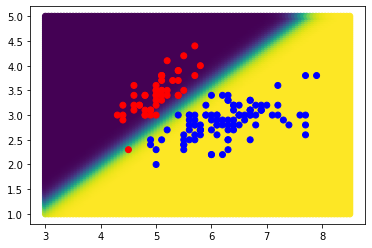

In [11]:
def konverzija(s):
    try:
        return float(s)
    except:
        if s == "Iris-setosa":
            return 0
        elif s == "Iris-versicolor" or s == "Iris-virginica":
            return 1
        return 0

with open("datasets/iris.csv") as fp:
    data = list(map(lambda d: list(map(lambda d: konverzija(d.strip()), d.split(","))), fp.readlines()))
    data = np.array(data)
    x = np.column_stack((data[:,0], data[:,1], np.ones(len(data))))
    y = data[:, 4]
    
    model = log_reg_sgd(x, y, lr=0.1, maksimalno_koraka=1000)
    
    plt_x1 = np.linspace(3, 8.5, 100)
    plt_x2 = np.linspace(1, 5, 100)
    plt_x1, plt_x2 = np.meshgrid(plt_x1.T, plt_x2)
    plt_xx = np.array([plt_x1.flatten(), plt_x2.flatten()]).T
    
    plt_xx = np.column_stack([plt_xx, np.ones(len(plt_xx))])
    
    plt.scatter(plt_xx[:,0], plt_xx[:,1], c=model(plt_xx))
    plt.scatter(x[:,0], x[:,1], c=np.where(y==0, "r", "b"))